## Ejercicio 1

Usando el conjunto de datos de 'houses' usado en la teoría, implementa el código necesario para:

- Añade una nueva columna al DF con nombre 'price_grp'. Esta columna tendrá valores entre 0 y 5, siendo 0 el 20% de fila con el precio más barato, y 5, el 20% de casas con el precio más caro.


In [1]:
# Importamos las librerías necesarias y exportamos nuestro Dataframe
import pandas as pd
import numpy as np 

import warnings 
import matplotlib
import matplotlib.pyplot as plt

from pathlib import Path 

ruta=Path("../datos/house.csv")

df_casas=pd.read_csv(filepath_or_buffer=ruta, sep=',')

C:\Users\muxor\AppData\Local\Temp\ipykernel_18116\764142814.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [29]:
# Utilizamos qcut para dividir en partes iguales todos los valores de los precios
# y ponemos el parámetro labels a False para utilizar los indices en lugar de las categorías

p=pd.qcut(df_casas['price'], q=5, labels=False)
df_casas['price_grp']=p
df_casas.head(10)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,1
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,2
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,2
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,3


- Comprueba si hay valores missings, y si es así, sustituyelo por otro valor.


In [72]:
# En este caso no hay
pd.isna(df_casas).sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
price_grp        0
dtype: int64

In [33]:
# Si hubiera datos missin los sustituimos por el valor justamente anterior
df_casas['bedrooms']=df_casas['bedrooms'].fillna(method='backfill')
df_casas.value_counts()

date                 price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  street                  city           statezip  country  price_grp
2014-05-02 00:00:00  235000.0   2.0       1.00       1210         9400      1.0     0           0     2          1210        0              1949      0             7542 21st Ave SW        Seattle        WA 98106  USA      0            1
2014-06-19 00:00:00  519000.0   3.0       2.75       2020         10744     1.0     0           0     5          1270        750            1954      0             18107-18199 6th Ave SW  Normandy Park  WA 98166  USA      2            1
                     576000.0   3.0       2.50       1940         9000      1.0     0           0     4          970         970            1948      0             8817 28th Ave NW        Seattle        WA 98117  USA      3            1
                     558000.0   4.0       2.25       2060

- ¿Cuál es el precio medio de las casas?

In [35]:
precio_medio=df_casas['price'].mean()
precio_medio

551962.9884732141

## Ejercicio 2

Genera un dataframe que contenga el número medio de baños ('bathrooms') y plantas ('floors') por cada valor de la variable 'condition'.


In [86]:
media_=df_casas.groupby('condition').agg({
    'bathrooms' : 'mean',
    'floors' : 'mean'
})
media_


,bathrooms,floors
condition,,
1,1.166667,1.083333
2,1.437500,1.156250
3,2.276957,1.651130
4,1.935903,1.277157
5,2.107471,1.301149


Genera otro dataframe con el precio min y máximo (mayores que 0) por cada valor de la variable 'condition'.


In [87]:
valores_max_min=df_casas.query('price > 0').groupby('condition').agg({
    'price' : ['min', 'max'] 
})
valores_max_min


price            
               min         max
condition                     
1           7800.0    550000.0
2          80000.0   2555000.0
3          83000.0  12899000.0
4          83300.0  26590000.0
5          83300.0   3200000.0

Une ambos dataframes para tener un último DF con toda la info

In [88]:
df_union=valores_max_min.join(media_, on='condition', how='inner')
df_union


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

## Ejercicio 3

Genera una pivot table que muestre el precio medio por planta y condición (floors y condition). Es decir, la tabla debe mostrar información del tipo:

- Las casa con 1 planta y condición 1 tienen de media un precio de 282560€
- Las casa con 2 planta y condición 3 tienen de media un precio de 622919€


In [45]:
tabla_precio_medio=pd.pivot_table(data=df_casas, index='condition', columns='floors', values='price', aggfunc='mean')
tabla_precio_medio

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,NaN,NaN,NaN,NaN
2,244226.000000,304077.500000,1.019333e+06,NaN,NaN,NaN
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,NaN
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,NaN


Rellena los valores missings con 0.


In [46]:
tabla_precio_medio=tabla_precio_medio.fillna(0)
tabla_precio_medio

floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,244226.000000,304077.500000,1.019333e+06,0.000000e+00,0.000000e+00,0.0
3,446558.941667,526978.427508,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537639,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,0.0
5,493234.266874,698686.446964,9.978914e+05,2.038333e+06,7.700000e+05,0.0



Por último, representa los valores de las casas de una planta en un gráfico de barras

<Axes: xlabel='condition'>

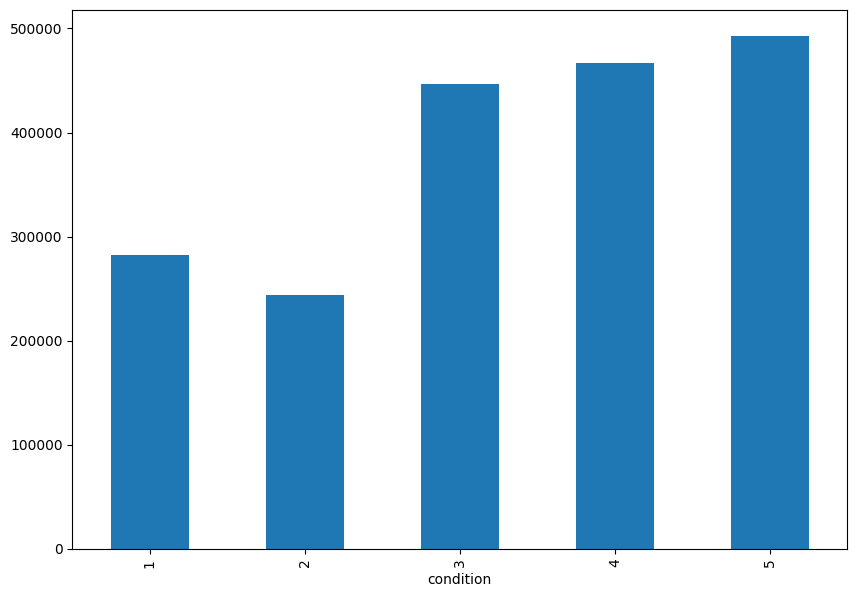

In [51]:
tabla_precio_medio[1.0].plot(kind='bar', figsize=(10, 7))